In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [25]:
#condiciones iniciales
w = 0.3
w0 = 1
B0 = 1*1*w0
h = 0.1
t = np.arange(0,20+h,h)

In [26]:
def campo_mag(w,t,B0):
    return B0 * np.sin(w*t)

In [38]:
def Lorentz(r,t,w,w0):
    
    x,y,z,vx,vy,vz = r
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = -w0*vy*np.sin(w*t)
    dvydt = w0*vx*np.sin(w*t)
    dvzdt = 0
    
    return [dxdt,dydt,dzdt,dvxdt,dvydt,dvzdt]

In [39]:
def Integrator2(f,r0,t,w,w0):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    z[0] = r0[2]
    vx[0] = r0[3]
    vy[0] = r0[4]
    vz[0] = r0[5]
    
    K1 = np.zeros(6)
    K2 = np.zeros(6)
    
    # Las pendientes instantaneas
    R = np.zeros(6)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1],y[i-1],z[i-1],vx[i-1],vy[i-1],vz[i-1]])
        
        K1 = f(R,t[i-1],w,w0)
        
        R = np.array([x[i-1]+h*K1[0],y[i-1]+h*K1[1],z[i-1]+h*K1[2],vx[i-1]+h*K1[3],vy[i-1]+h*K1[4],vz[i-1]+h*K1[5]])
        
        K2 = f(R,t[i-1]+h,w,w0)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])
        y[i] = y[i-1] + 0.5*h*(K1[1]+K2[1])
        z[i] = z[i-1] + 0.5*h*(K1[2]+K2[2])
        
        vx[i] = vx[i-1] + 0.5*h*(K1[3]+K2[3])
        vy[i] = vy[i-1] + 0.5*h*(K1[4]+K2[4])
        vz[i] = vz[i-1] + 0.5*h*(K1[5]+K2[5])
        
    return x,y,z,vx,vy,vz

0.1


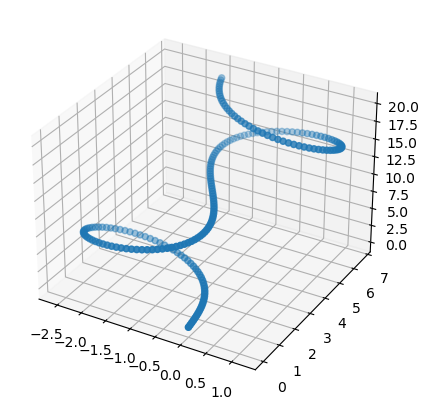

In [43]:
r0 = [0.,0.,0.,0.,1.,1.]
x,y,z,vx,vy,vz = Integrator2(Lorentz,r0,t,w,w0)
figH = plt.figure(figsize=(5,5))
axH = figH.add_subplot(projection="3d")
axH.scatter(x,y,z)